# 🧩 TP : Résolution de Labyrinthe avec NetworkX
Dans ce TP, nous allons représenter un labyrinthe sous forme de graphe et trouver un chemin optimal en utilisant **NetworkX**. Nous implémenterons les algorithmes de recherche suivants :
- **BFS** (Recherche en largeur)
- **DFS** (Recherche en profondeur)
- **A*** (A-star) avec différentes heuristiques

🔎 **Objectif** : Trouver le chemin le plus court entre le point de départ 'S' et la sortie 'E'.


## 1. Importation des bibliothèques nécessaires
Nous allons utiliser :
- `networkx` pour modéliser le labyrinthe sous forme de graphe.
- `numpy` pour manipuler la grille.
- `collections.deque` pour utiliser les structures FIFO et LIFO dans BFS et DFS.


In [1]:
import networkx as nx
import numpy as np
from collections import deque


## 2. Représentation du Labyrinthe
On s'intéresse au labyrinthe suivant :

<img src="labyrinthe_corrected.png" alt="Labyrinthe" width="300"/>

Représenter la strcucture du labyrinthe sous forme de matrice (liste de listes en python) où :
- `0` = Passage libre
- `1` = Mur
- `'S'` = Départ
- `'E'` = Sortie


In [4]:
Labyrinthe = [
   ###################################
]

Afficher le nombre de lignes du labyrinthe (taille) 

In [7]:
###################

5

Afficher le nombre de colonnes du labyrinthe (taille de la première ligne) 

In [10]:
###################

7

##  3. Trouver les positions de départ et d'arrivée

Ecrire une fonction qui cherche les coordonnées du point de départ (start) et du point d'arrivée (end), à partir de la matrice du labyrinthe.

La fonction doit retourner les coordonnées (x, y) de chaque point, comme ceci : \
**Start: (4, 0) \
End: (0, 6)**

<u>Indication</u> : la fonction parcourt les lignes et les colonnes avec des boucles for pour trouver les cellules qui contiennent les lettres 'S' et 'E'.

In [28]:
def find_positions(labyrinthe):
    start, end = None, None
    ###################
    ###################
    ###################
    ###################
    return start, end

# Vérification
start, end = find_positions(Labyrinthe)
print('Start:', start, '| End:', end)

Start: (4, 0) | End: (0, 6)


## 4. Construction du Graphe avec NetworkX
Nous allons créer un graphe où :
- Chaque case du labyrinthe est un **nœud**.
- Un chemin entre deux cases est une **arête**.


In [ ]:
def build_graph(labyrinthe):
    G = nx.Graph()
    rows, cols = len(labyrinthe), len(labyrinthe[0])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for x in range(rows):
        for y in range(cols):
            if labyrinthe[x][y] != 1:  # Pas un mur
                G.add_node((x, y))
                for dx, dy in directions:
                    n_x, n_y = x + dx, y + dy
                    if 0 <= n_x < rows and 0 <= n_y < cols and labyrinthe[n_x][n_y] != 1:
                        G.add_edge((x, y), (n_x, n_y), weight=1)
                        
     return G

# Construction du graphe
G = build_graph(Labyrinthe)
print('Nombre de nœuds :', len(G.nodes))
print('Nombre d’arêtes :', len(G.edges))

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_labyrinth_graph(graph):
    pos = {node: (node[1], -node[0]) for node in graph.nodes}  # Positionner les nœuds selon leurs coordonnées
    plt.figure(figsize=(8, 8))
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')
    plt.show()

# Affichage du graphe
draw_labyrinth_graph(G)


Afficher les noeuds du graphe

Afficher les arêtes du graphe G

## 5. Recherche avec BFS et DFS
Nous allons implémenter BFS et DFS pour trouver un chemin vers la solution. 

La fonction **shortest_path() de NetworkX** utilise l'algorithme de recherche Dijkstra. Mais, puisque notre problème correspond à un graphe non pondéré (le même coût pour passer d'un noeud à un autre), donc il se compote exactement comme un BFS.  

In [40]:
# BFS (Recherche en largeur)
def bfs_path(graph, start, end):
    """Recherche BFS du chemin le plus court"""
    try:
        path = nx.shortest_path(graph, source=start, target=end)
        return path, len(path)
        
    except nx.NetworkXNoPath:
        return None, 0

La fonction **dfs_preorder_nodes de NetworkX** génère des nœuds dans un ordre préalable de recherche en profondeur en commençant par la source.

In [43]:
# DFS (Recherche en profondeur)
def dfs_path(graph, start, end):
    """Recherche DFS du chemin (non optimal)"""
    try:
        path = list(nx.dfs_preorder_nodes(graph, source=start))
        if end in path:
            idx = path.index(end)
            return path[:idx + 1], len(path[:idx + 1])
        else:
            return None, 0
    except nx.NetworkXNoPath:
        return None, 0





**Appliquer la recherche par BFS puis par DFS pour trouver le chemin vers la destination dans notre labyrinthe.**

Pour chaque algorithme, afficher **le chemin obtenu** ainsi que **sa longueur**.

In [ ]:
# Test des fonctions
#########################
#########################
#########################
#########################

## 6. Implémentation de A* avec `networkx.astar_path`
L'algorithme A* utilise une **fonction heuristique** pour guider la recherche. Nous utiliserons la distance de Manhattan comme heuristique. 
La distance de Manhattan se calcule comme suit :
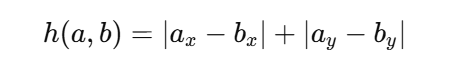

Compléter le code suivant.

In [ ]:
# Heuristique de Manhattan
def heuristique(a, b):
    hs = ####################################
    return hs


# A* avec NetworkX
def astar_path(graph, start, end, heuristique):
    try:
        path = nx.astar_path(graph, source=start, target=end, heuristic=heuristique)
        return path, len(path)
    except nx.NetworkXNoPath:
        return None

# Test de A*
astar_solution, length_astar = ######################################
print('Chemin A*:', astar_solution)
print('Longueur du Chemin A*:', length_astar)

## 7. Affichage du Labyrinthe avec le Chemin Trouvé
Nous allons visualiser le chemin trouvé avec BFS, DFS et A*.

In [ ]:
import matplotlib.pyplot as plt

def draw_labyrinthe(labyrinthe, path):
    """Affiche le labyrinthe avec le chemin trouvé"""
    labyrinthe_copy = np.array(labyrinthe, dtype=str)

    # Marquer le chemin trouvé avec '*'
    for (x, y) in path:
        if labyrinthe_copy[x][y] not in ['S', 'E']:
            labyrinthe_copy[x][y] = '*'

    for row in labyrinthe_copy:
        print(' '.join(row))



In [ ]:
# Affichage des résultats
print('\n🔵 Chemin BFS:')
if bfs_solution:
    draw_labyrinthe(Labyrinthe, bfs_solution)

print('\n🔴 Chemin DFS:')
if dfs_solution:
    draw_labyrinthe(Labyrinthe, dfs_solution)

print('\n🟢 Chemin A*:')
if astar_solution:
    draw_labyrinthe(Labyrinthe, astar_solution)

## 8. Exercice

#### a- Créer une nouvelle fonction **heuristique_euclidienne(a, b)** qui utilise une autre heuristique basée sur la distance euclidienne, calculée comme suit :
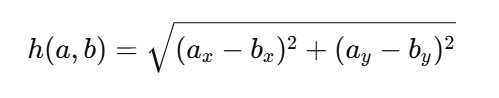

#### b- Ecrire un programme qui crée un graphe G à partir d'un labyrinthe que vous proposez, et applique les 3 algorithmes de recherche BFS, DFS et A* sur ce labyrinthe. Pour chaque algorithme, afficher :
##### 1- le temps d'exécution de l'algorithme
##### 2- la longueur du chemin trouvé
##### 3- Affichage du Labyrinthe avec le Chemin Trouvé